# 연관 규칙 분석

먼저 필요한 라이브러리를 설치해야 한다.<br><br><br>사전 설치가 필요한 Library 리스트<br> 
pip install numpy-1.13.1+mkl-cp36-cp36m-win_amd64.whl # 아나콘다의 경우 제외<br>
pip install scipy-0.19.1-cp36-cp36m-win_amd64.whl # 아나콘다의 경우 제외<br>
pip install mlxtend<br>
pip install sklearn<br>

분석에 필요한 라이브러리를 불러온다.

In [20]:
import pandas as pd

이 실습에서는 타이타닉 생존자, 희생자 데이터를 분석한다. <br> 먼저 분석할 데이터를 불러와서 titanic 데이터 프레임을 만든다.

In [21]:
titanic = pd.read_table('./data/titanic.txt')
titanic.shape # 읽어온 데이터 구조 확인

(1313, 5)

head 함수는 최초 5개의 데이터를 출력해준다.

In [22]:
titanic.head() # 가장 앞 5개의 데이터를 출력

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


tail 함수는 가장 마지막 5개의 데이터를 출력한다.

In [23]:
titanic.tail() # 가장 뒤 5개의 데이터를 출력

,Name,PClass,Age,Sex,Survived
1308,"Zakarian, Mr Artun",3rd,27.0,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0
1312,"Zimmerman, Leo",3rd,29.0,male,0


Name 열은 분석에서 사용하지 않을 것이기 때문에 제거 한다.

In [24]:
# Remove "Name" column
titanic_ar = titanic.iloc[:, 1:5]
titanic_ar.head()

,PClass,Age,Sex,Survived
0,1st,29.00,female,1
1,1st,2.00,female,0
2,1st,30.00,male,0
3,1st,25.00,female,0
4,1st,0.92,male,1


현재 나이 정보를 담고 있는 Age 열은 숫자형으로 나이를 담고 있다. <br> 연관 규칙 분석을 위해 이 변수를 명목형 변수로 변환한다.<br> 20세 이상인 경우는 Adult, 20세 미만인 경우 Child, 정보가 없는 경우 Unknown으로 구성한다.

In [25]:
# Age를 명목형 변수로 변경
c_idx = titanic_ar.loc[:,'Age'] < 20
a_idx = titanic_ar.loc[:,'Age'] >= 20
na_idx = titanic_ar.loc[:,'Age'].isnull()

In [26]:
titanic_ar.loc[c_idx,'Age'] = 'Child'
titanic_ar.loc[a_idx,'Age'] = 'Adult'
titanic_ar.loc[na_idx,'Age'] = 'Unknown'

작업한 결과를 확인한다. <br> head 명령어에 인자를 줘서 확인하고자 하는 행의 개수를 지정할 수 있다.

In [27]:
titanic_ar.head(20) # 변경된 데이터 확인

,PClass,Age,Sex,Survived
0,1st,Adult,female,1
1,1st,Child,female,0
2,1st,Adult,male,0
3,1st,Adult,female,0
4,1st,Child,male,1
5,1st,Adult,male,1
6,1st,Adult,female,1
7,1st,Adult,male,0
8,1st,Adult,female,1
9,1st,Adult,male,0


생존 정보를 담고 있는 열도 위와 마찬가지로 명목형 변수로 변환한다. 생존자의 경우 'Survived', 희생자의 경우 'Died'로 변환한다.

In [28]:
survived_idx = titanic_ar.loc[:,'Survived'] == 1
dead_idx = titanic_ar.loc[:,'Survived'] == 0
titanic_ar.loc[survived_idx,'Survived'] = 'Survived'
titanic_ar.loc[dead_idx,'Survived'] = 'Died'

연관 규칙 분석을 위해서 mlxtend 라이브러리를 사용하고, 필요한 라이브러리를 불러온다.

In [29]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import association_rules

mlxtend는 One-hot 인코딩된 데이터 프레임을 입력으로 받기 때문에, 위에서 구성한 데이터를 입력 형태에 맞게 변환한다.

In [30]:
dataset = titanic_ar.values.tolist()
oht = OnehotTransactions()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

,1st,2nd,3rd,Adult,Child,Died,Survived,Unknown,female,male
0,1,0,0,1,0,0,1,0,1,0
1,1,0,0,0,1,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,1,0,0,1
5,1,0,0,1,0,0,1,0,0,1
6,1,0,0,1,0,0,1,0,1,0
7,1,0,0,1,0,1,0,0,0,1
8,1,0,0,1,0,0,1,0,1,0
9,1,0,0,1,0,1,0,0,0,1


위에서 작성한 입력 데이터 프레임을 이용하여 apriori 알고리즘으로 빈발 아이템셋을 구한다.

In [31]:
frequent_itemsets = apriori(df, use_colnames=True,min_support=0.1)
frequent_itemsets

,support,itemsets
0,0.245240,[1st]
1,0.213252,[2nd]
2,0.541508,[3rd]
3,0.462300,[Adult]
4,0.113481,[Child]
5,0.657273,[Died]
6,0.342727,[Survived]
7,0.424219,[Unknown]
8,0.351866,[female]
9,0.648134,[male]


위에서 구한 빈발 아이템셋을 이용하여 confidence가 0.8 이상인 연관 규칙을 찾는다. 결과 데이터 프레임에서 support, confidence, lift 값을 확인할 수 있다.

In [32]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

,antecedants,consequents,support,confidence,lift
0,(3rd),(Died),0.541508,0.805907,1.226137
1,(Died),(male),0.657273,0.821553,1.267566
2,(male),(Died),0.648134,0.833137,1.267566
3,"(female, 1st)",(Survived),0.108911,0.937063,2.734141
4,"(2nd, Died)",(male),0.122620,0.919255,1.418309
5,"(2nd, male)",(Died),0.131759,0.855491,1.301576
6,"(Unknown, 3rd)",(Died),0.299315,0.847328,1.289156
7,"(female, Died)",(3rd),0.117289,0.857143,1.582881
8,"(3rd, male)",(Died),0.380046,0.883768,1.344596
9,"(Adult, Died)",(male),0.285605,0.869333,1.341286


이번에는 lift 값이 1.2 이상인 규칙을 찾아본다.

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedants,consequents,support,confidence,lift
0,(1st),(Adult),0.245240,0.633540,1.370409
1,(Adult),(1st),0.462300,0.336079,1.370409
2,(1st),(Survived),0.245240,0.599379,1.748854
3,(Survived),(1st),0.342727,0.428889,1.748854
4,(1st),(female),0.245240,0.444099,1.262127
5,(female),(1st),0.351866,0.309524,1.262127
6,(Adult),(2nd),0.462300,0.278418,1.305584
7,(2nd),(Adult),0.213252,0.603571,1.305584
8,(Dead),(3rd),0.657273,0.663963,1.226137
9,(3rd),(Dead),0.541508,0.805907,1.226137


규칙의 원인의 개수를 이용하여 규칙을 필터링 할 수 있도록, 원인의 개수를 구하여 규칙 데이터프레임에 추가한다.

In [34]:
# 길이 정보를 갖는 열 추가
rules["antecedant_len"] = rules["antecedants"].apply(lambda x: len(x))
rules

,antecedants,consequents,support,confidence,lift,antecedant_len
0,(3rd),(Died),0.541508,0.805907,1.226137,1
1,(Died),(male),0.657273,0.821553,1.267566,1
2,(male),(Died),0.648134,0.833137,1.267566,1
3,"(female, 1st)",(Survived),0.108911,0.937063,2.734141,2
4,"(2nd, Died)",(male),0.122620,0.919255,1.418309,2
5,"(2nd, male)",(Died),0.131759,0.855491,1.301576,2
6,"(Unknown, 3rd)",(Died),0.299315,0.847328,1.289156,2
7,"(female, Died)",(3rd),0.117289,0.857143,1.582881,2
8,"(3rd, male)",(Died),0.380046,0.883768,1.344596,2
9,"(Adult, Died)",(male),0.285605,0.869333,1.341286,2


위에서 추가한 정보를 바탕으로 원인의 길이가 2개 이상, Confidence가 0.75이상, lift가 1.2 이상인 규칙을 출력한다.

In [35]:
rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedants,consequents,support,confidence,lift,antecedant_len
3,"(female, 1st)",(Survived),0.108911,0.937063,2.734141,2
4,"(2nd, Died)",(male),0.122620,0.919255,1.418309,2
5,"(2nd, male)",(Died),0.131759,0.855491,1.301576,2
6,"(Unknown, 3rd)",(Died),0.299315,0.847328,1.289156,2
7,"(female, Died)",(3rd),0.117289,0.857143,1.582881,2
8,"(3rd, male)",(Died),0.380046,0.883768,1.344596,2
9,"(Adult, Died)",(male),0.285605,0.869333,1.341286,2
10,"(Adult, male)",(Died),0.300838,0.825316,1.255667,2
11,"(Unknown, Died)",(male),0.319878,0.802381,1.237986,2
12,"(Unknown, male)",(Died),0.291698,0.879896,1.338706,2


희생자들의 특징을 파악하기 위해 조건을 줘서 규칙을 검색한다.

In [36]:
# 희생자에 대한 Rule 분석
rules[ (rules['confidence'] > 0.75) &
       (rules['consequents'] == frozenset({'Died'})) ]

,antecedants,consequents,support,confidence,lift,antecedant_len
0,(3rd),(Died),0.541508,0.805907,1.226137,1
2,(male),(Died),0.648134,0.833137,1.267566,1
5,"(2nd, male)",(Died),0.131759,0.855491,1.301576,2
6,"(Unknown, 3rd)",(Died),0.299315,0.847328,1.289156,2
8,"(3rd, male)",(Died),0.380046,0.883768,1.344596,2
10,"(Adult, male)",(Died),0.300838,0.825316,1.255667,2
12,"(Unknown, male)",(Died),0.291698,0.879896,1.338706,2
13,"(Adult, 3rd, male)",(Died),0.131759,0.867052,1.319165,3
15,"(Unknown, 3rd, male)",(Died),0.215537,0.908127,1.381658,3


# 장바구니 분석

장바구니 분석 예제를 위해 다음 명령어로 필요한 라이브러리를 설치한다.<br><br>
pip install pytagcloud<br>
pip install pygame<br>
pip install simplejson<br>

분석할 데이터 파일을 불러 오고, 데이터의 수를 확인한다.

In [46]:
transaction = open('./data/groceries.csv','r').readlines()
len(transaction)
gloceries = []
for line in transaction:
    line = line.replace('\n','').split(',')
    gloceries.append(line)
len(gloceries) # 불러온 데이터 수 확인

9835

분석에 필요한 라이브러리를 로드한다.

In [47]:
from collections import Counter
import pytagcloud
import itertools

불러온 데이터의 특징을 파악하기 위해 Word Cloud를 그려본다.

In [48]:
nouns = list(itertools.chain(*gloceries))
count = Counter(nouns)
tag2 = count.most_common(100)
taglist = pytagcloud.make_tags(tag2, maxsize=80)
pytagcloud.create_tag_image(taglist, './wordcloud.jpg', size=(1024, 768), fontname='Coustard', rectangular=False)

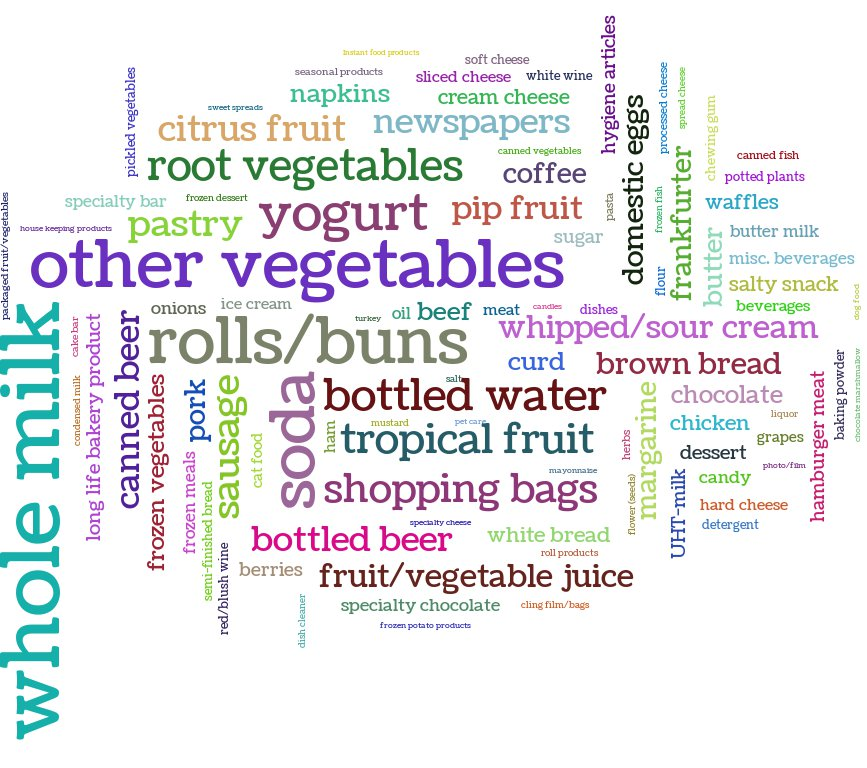

In [49]:
from IPython.display import Image
Image("./wordcloud.jpg")

각 항목들이 어느 정도의 비중을 갖고 있는지 히스토그램으로 상위 30개에 대해 확인해 본다.

In [50]:
# Plot histogram using matplotlib bar().
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

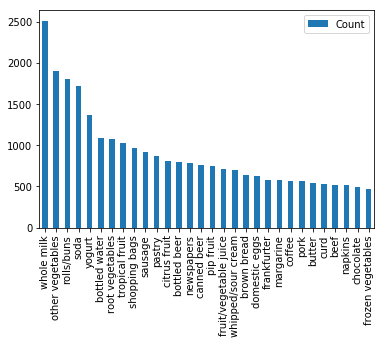

In [51]:
df = pd.DataFrame.from_dict(count, orient='index')
df.columns = ['Count']
view = df.sort_values('Count',ascending=False)[0:30]
%matplotlib inline
view.plot(kind='bar')

앞선 타이타닉 예제와 마찬가지로 분석을 위해 One-hot 인코딩된 형태로 데이터 프레임을 생성한다.

In [52]:
oht = OnehotTransactions()
oht_ary = oht.fit(gloceries).transform(gloceries)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


빈발 아이템 셋을 구한다.

In [53]:
frequent_itemsets = apriori(df, use_colnames=True,min_support=0.01)
frequent_itemsets

,support,itemsets
0,0.033452,[UHT-milk]
1,0.017692,[baking powder]
2,0.052466,[beef]
3,0.033249,[berries]
4,0.026029,[beverages]
5,0.080529,[bottled beer]
6,0.110524,[bottled water]
7,0.064870,[brown bread]
8,0.055414,[butter]
9,0.027961,[butter milk]


앞서 구한 빈발 아이템셋을 이용하여 confidence가 0.5 이상인 연관 규칙을 찾는다.

In [54]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedants,consequents,support,confidence,lift
0,"(other vegetables, butter)",(whole milk),0.020031,0.573604,2.244885
1,"(root vegetables, citrus fruit)",(other vegetables),0.017692,0.586207,3.029608
2,"(curd, yogurt)",(whole milk),0.017285,0.582353,2.279125
3,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.552511,2.162336
4,"(other vegetables, pip fruit)",(whole milk),0.026131,0.517510,2.025351
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.502092,2.594890
6,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.584541,3.020999
7,"(root vegetables, yogurt)",(other vegetables),0.025826,0.500000,2.584078
8,"(other vegetables, whipped/sour cream)",(whole milk),0.028876,0.507042,1.984385
9,"(other vegetables, yogurt)",(whole milk),0.043416,0.512881,2.007235


lift가 2 이상인 연관 규칙을 찾고, 원인 절의 길이 정보를 갖는 열을 추가한다.

In [56]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2.0)
# 길이 정보를 갖는 열 추가
rules["antecedant_len"] = rules["antecedants"].apply(lambda x: len(x))
rules

,antecedants,consequents,support,confidence,lift,antecedant_len
0,(beef),(root vegetables),0.052466,0.331395,3.040367,1
1,(root vegetables),(beef),0.108998,0.159515,3.040367,1
2,(berries),(yogurt),0.033249,0.318043,2.279848,1
3,(yogurt),(berries),0.139502,0.075802,2.279848,1
4,(root vegetables),(butter),0.108998,0.118470,2.137897,1
5,(butter),(root vegetables),0.055414,0.233028,2.137897,1
6,(whipped/sour cream),(butter),0.071683,0.141844,2.559698,1
7,(butter),(whipped/sour cream),0.055414,0.183486,2.559698,1
8,(other vegetables),(chicken),0.193493,0.092486,2.155439,1
9,(chicken),(other vegetables),0.042908,0.417062,2.155439,1


lift 기준으로 상위 10개의 규칙을 내림차순으로 표시한다.

In [57]:
rules.sort_values('lift',ascending=False).head(10)

,antecedants,consequents,support,confidence,lift,antecedant_len
67,(curd),"(whole milk, yogurt)",0.053279,0.188931,3.372304,1
66,"(whole milk, yogurt)",(curd),0.056024,0.179673,3.372304,2
54,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.095149,3.295045,1
51,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.359155,3.295045,2
121,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.234192,3.267062,2
124,(whipped/sour cream),"(other vegetables, yogurt)",0.071683,0.141844,3.267062,1
93,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.342776,3.144780,2
96,(root vegetables),"(other vegetables, tropical fruit)",0.108998,0.112873,3.144780,1
0,(beef),(root vegetables),0.052466,0.331395,3.040367,1
1,(root vegetables),(beef),0.108998,0.159515,3.040367,1
